# AI/ML Salaries
## Data Science job salaries from 2020 to 2023

The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

## The dataset contains one table structured as follow:

- **work_year:** The year the salary was paid.
- **experience_level:** The experience level in the job during the year with the following possible values:
    - **EN:** Entry-level / Junior
    - **MI:** Mid-level / Intermediate
    - **SE:** Senior-level / Expert
    - **EX:** Executive-level / Director
- **employment_type:** The type of employement for the role:
    - **PT:** Part-time
    - **FT:** Full-time
    - **CT:** Contract
    - **FL:** Freelance
- **job_title:** The role worked in during the year.
- **salary:** The total gross salary amount paid.
- **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
    - **0:** No remote work (less than 20%)
    - **50:** Partially remote
    - **100:** Fully remote (more than 80%)
- **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size:** The average number of people that worked for the company during the year:
    - **S:** less than 50 employees (small)
    - **M:** 50 to 250 employees (medium)
    - **L:** more than 250 employees (large)

In [1]:
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',', engine = 'python')
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M
5,2023,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
6,2023,SE,FT,Data Analyst,169000,USD,169000,US,0,US,M
7,2023,SE,FT,Data Analyst,110600,USD,110600,US,0,US,M
8,2023,SE,FT,Data Operations Engineer,193000,USD,193000,US,100,US,M
9,2023,SE,FT,Data Operations Engineer,136850,USD,136850,US,100,US,M


In [2]:
# handle missing checking
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
# check labels for encoding
print(f"work year: {df['work_year'].unique()}")
print(f"experience_level: {df['experience_level'].unique()}")
print(f"employment_type: {df['employment_type'].unique()}")
print(f"job_title: {df['job_title'].unique()}")
print(f"salary_currency: {df['salary_currency'].unique()}")
print(f"employee_residence: {df['employee_residence'].unique()}")
print(f"remote_ratio: {df['remote_ratio'].unique()}")
print(f"company_location: {df['company_location'].unique()}")
print(f"company_size: {df['company_size'].unique()}")

work year: [2023 2022 2021 2020]
experience_level: ['EN' 'MI' 'SE' 'EX']
employment_type: ['FT' 'FL' 'PT' 'CT']
job_title: ['Data Analyst' 'Analytics Engineer' 'Data Engineer'
 'Data Operations Engineer' 'Machine Learning Engineer' 'Data Scientist'
 'BI Developer' 'Data Science Lead' 'ML Engineer' 'Data Science Manager'
 'Data Analytics Manager' 'Data Architect' 'BI Data Engineer'
 'Deep Learning Researcher' 'BI Analyst' 'Data Science Consultant'
 'Research Scientist' 'Data Analytics Specialist' 'AI Developer'
 'Data Engineering' 'Software Data Engineer' 'Machine Learning Scientist'
 'Data Manager' 'Machine Learning Infrastructure Engineer'
 'Business Data Analyst' 'Head of Data' 'Computer Vision Engineer'
 'BI Data Analyst' 'Lead Data Scientist' 'Research Engineer'
 'Head of Data Science' 'Data Quality Analyst' 'Insight Analyst'
 'Applied Machine Learning Engineer' 'AI Scientist'
 'Deep Learning Engineer' 'Data Infrastructure Engineer'
 'Machine Learning Software Engineer' 'Big Data A

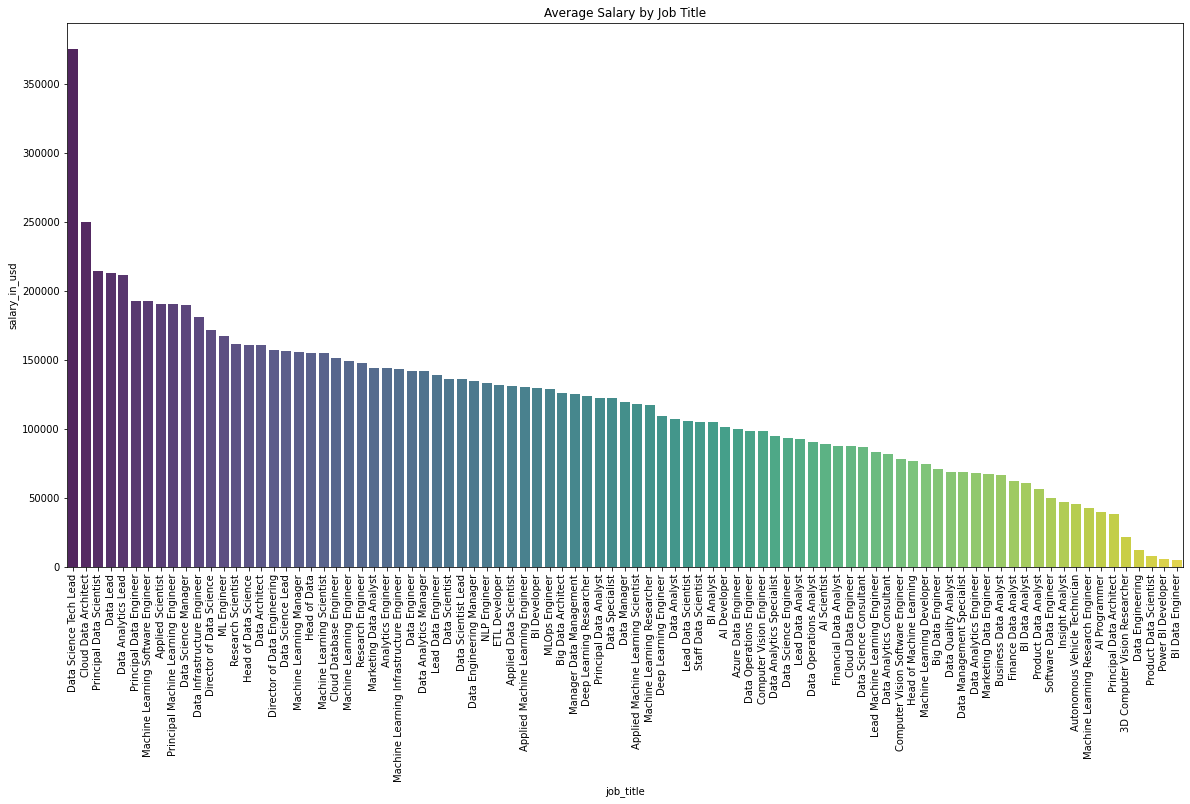

In [4]:
# analysis salary data in us dollar by using job title
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot

# Calculate the average salary for each job title
average_salary_by_job = plot_df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Sort the job titles by average salary in descending order
average_salary_by_job = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False)
# print(average_salary_by_job)

# Create a bar chart of average salaries by job title
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='job_title', y='salary_in_usd', data=average_salary_by_job, ax=ax, palette='viridis', alpha=0.9)
plt.title('Average Salary by Job Title')
plt.xticks(rotation=90)
plt.show()

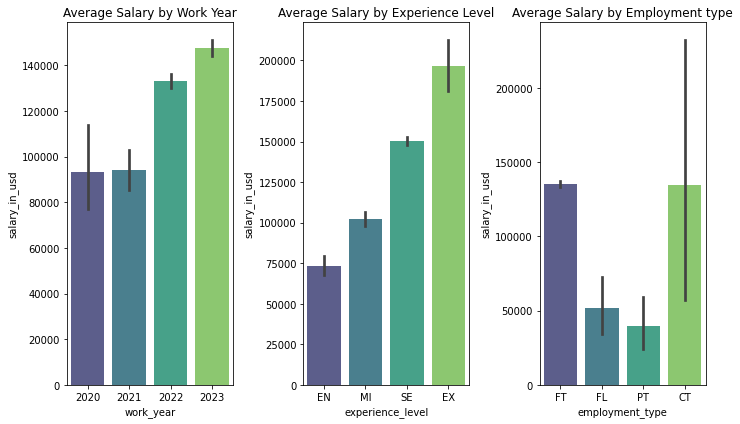

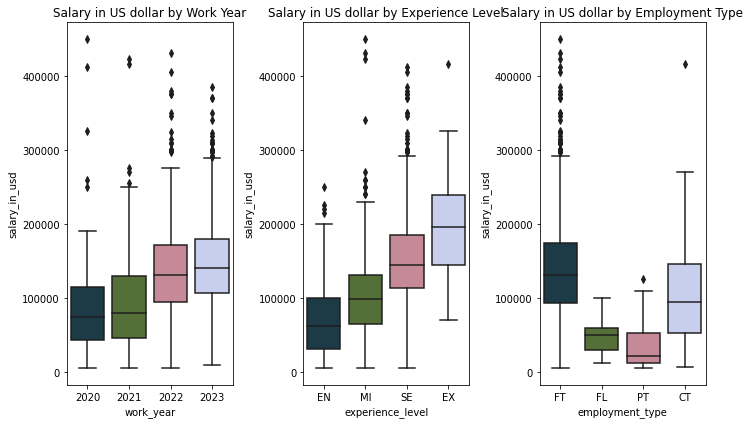

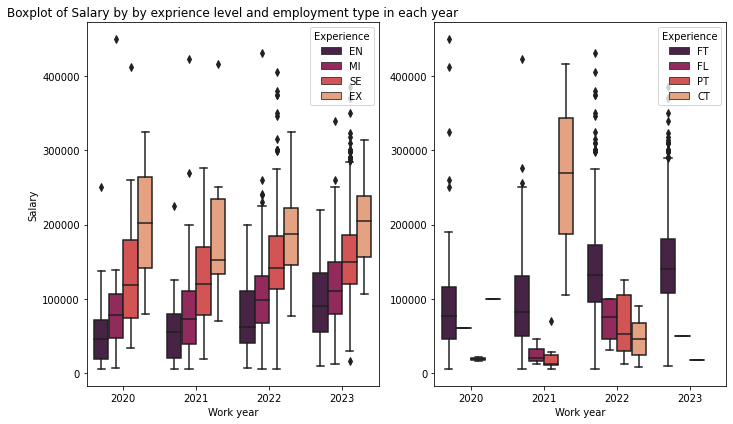

In [5]:
# analysis salary data in us dollar by using work_year, experience_level, employment_type
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot
fig, ax = plt.subplots(1,3,figsize=(10,6))
sns.barplot(x='work_year', y='salary_in_usd', data=plot_df, ax=ax[0], palette='viridis', alpha=0.9)
ax[0].set_title('Average Salary by Work Year')

sns.barplot(x='experience_level', y='salary_in_usd', data=plot_df, ax=ax[1], palette='viridis', alpha=0.9)
ax[1].set_title('Average Salary by Experience Level')

sns.barplot(x='employment_type', y='salary_in_usd', data=plot_df, ax=ax[2], palette='viridis', alpha=0.9)
ax[2].set_title('Average Salary by Employment type')

# Show the plot
plt.tight_layout()
plt.show()

# comparing graph with box plot
fig, ax = plt.subplots(1,3,figsize=(10,6))
sns.boxplot(x='work_year', y='salary_in_usd', data=plot_df, ax=ax[0], palette='cubehelix')
ax[0].set_title('Salary in US dollar by Work Year')

sns.boxplot(x='experience_level', y='salary_in_usd', data=plot_df, ax=ax[1], palette='cubehelix')
ax[1].set_title('Salary in US dollar by Experience Level')

sns.boxplot(x='employment_type', y='salary_in_usd', data=plot_df, ax=ax[2], palette='cubehelix')
ax[2].set_title('Salary in US dollar by Employment Type')


# Show the plot
plt.tight_layout()
plt.show()

# Create a boxplot using catplot
fig, ax = plt.subplots(1,2, figsize=(10, 6))

# sns.catplot(x='work_year', y='salary_in_usd', hue='employment_type', kind='box', data=plot_df, palette="rocket")
sns.boxplot(x='work_year', y='salary_in_usd', hue = 'experience_level', data=plot_df , ax=ax[0], palette="rocket")
ax[0].set_title('Boxplot of Salary by by exprience level and employment type in each year')
ax[0].set_xlabel('Work year')
ax[0].set_ylabel('Salary')
ax[0].legend(title='Experience',loc='upper right')

sns.boxplot(x='work_year', y='salary_in_usd',hue = 'employment_type', data=plot_df ,ax=ax[1], palette="rocket")
ax[1].legend(title='Experience',loc='upper right')
ax[1].set_xlabel('Work year')
ax[1].set_ylabel('')
# plt.title('Boxplot of Salary by by exprience level and employment type in each year')

# Show the plot
plt.tight_layout()
plt.show()

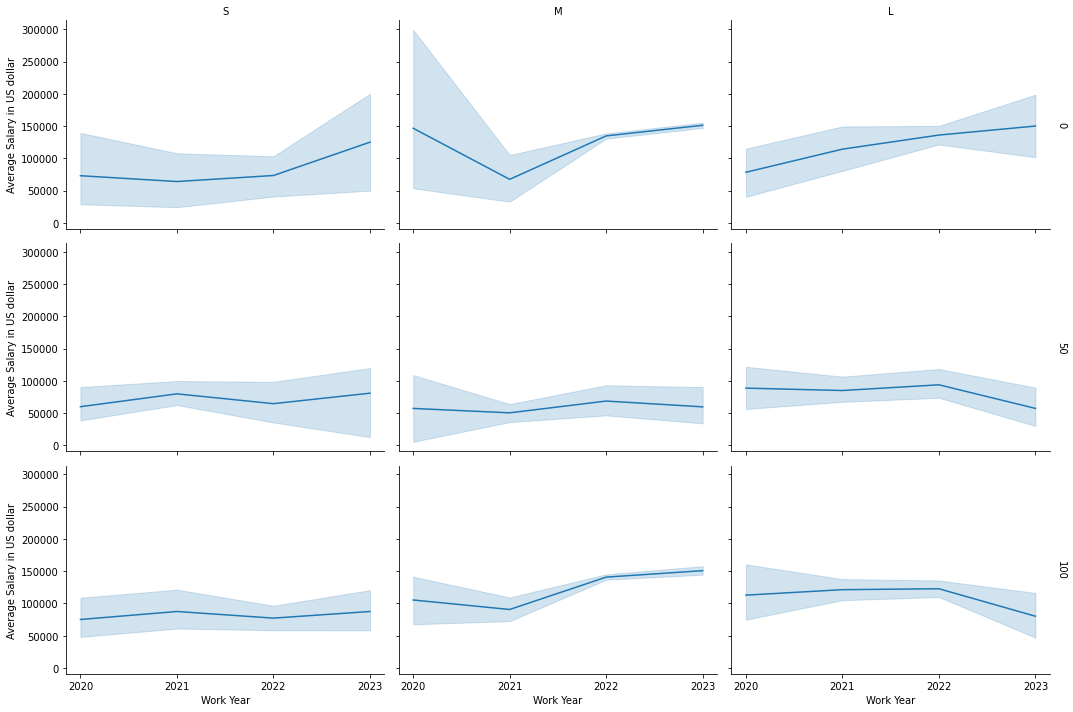

In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Convert 'work_year' to string
plot_df['work_year'] = plot_df['work_year'].astype(str)
plot_df = plot_df.sort_values(by='work_year', ascending=True)

# Create a FacetGrid for subplots
g = sns.FacetGrid(plot_df, col='company_size', row='remote_ratio', margin_titles=True)
g.map(sns.lineplot, 'work_year', 'salary_in_usd')

# Set titles for the subplots
g.set_axis_labels('Work Year', 'Average Salary in US dollar')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Adjust the size of the plots
g.fig.set_size_inches(15, 10)

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
# label data
def mapped_labels(df,cols):
    class_mapping = dict()
    selected_df = df[cols].copy()
    for col in cols:
        i = 0
        print(selected_df[col].dtypes)
        if selected_df[col].dtypes=="object":
            for cls in selected_df[col].unique():
                class_mapping[cls] = i
                i = i + 1
            selected_df["encode_"+col] = selected_df[col]
            selected_df[col] = selected_df["encode_"+col].map(class_mapping)
            print(selected_df['encode_'+col])
            del selected_df["encode_"+col]
    return selected_df

## selected columns for make features and model
# columns = ["work_year","experience_level","employment_type","job_title","salary_in_usd","company_location","employee_residence"]
columns = ["experience_level","job_title","salary_in_usd"]

selected_df = mapped_labels(df, columns)
selected_df

object
0       EN
1       EN
2       MI
3       MI
4       SE
        ..
3001    SE
3002    MI
3003    EN
3004    EN
3005    SE
Name: encode_experience_level, Length: 3006, dtype: object
object
0                   Data Analyst
1                   Data Analyst
2             Analytics Engineer
3             Analytics Engineer
4                  Data Engineer
                  ...           
3001              Data Scientist
3002    Principal Data Scientist
3003              Data Scientist
3004       Business Data Analyst
3005        Data Science Manager
Name: encode_job_title, Length: 3006, dtype: object
int64


,experience_level,job_title,salary_in_usd
0,0,0,75000
1,0,0,60000
2,1,1,185700
3,1,1,165000
4,2,2,160000
...,...,...,...
3001,2,5,412000
3002,1,83,151000
3003,0,5,105000
3004,0,24,100000


In [24]:
# normalized data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features = std.fit_transform(selected_df)
features

array([[ 1.13065604, -2.40987835, -0.94467602],
       [ 1.13065604, -2.40987835, -1.18370252],
       [ 1.13065604, -0.93269761,  0.81933959],
       ...,
       [-3.22299733, -2.40987835, -0.46662301],
       [-3.22299733, -2.40987835, -0.54629851],
       [-1.77177954,  0.54448312, -0.63131227]])

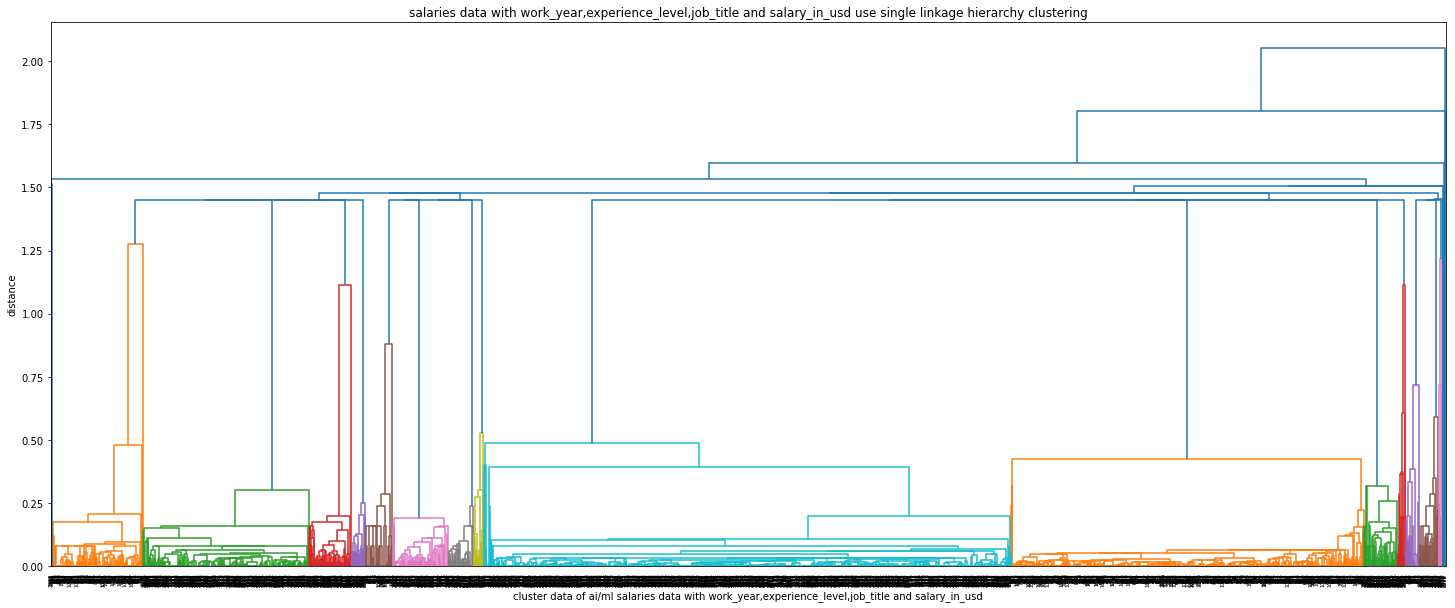

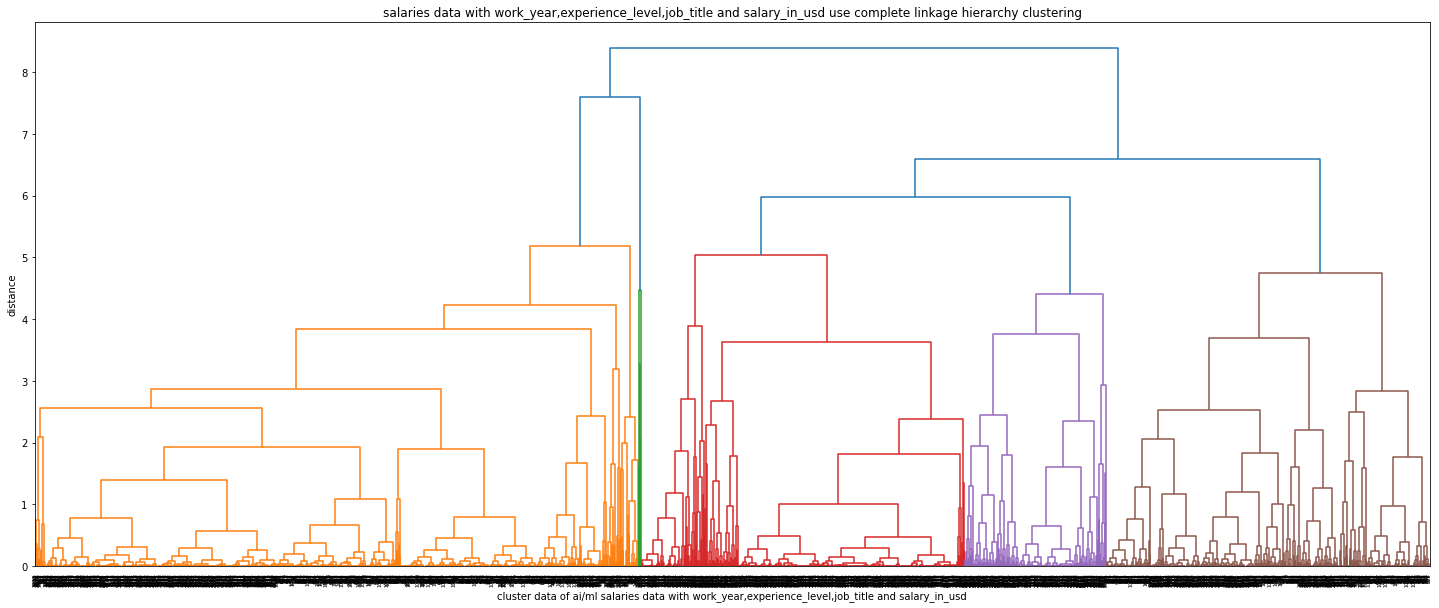

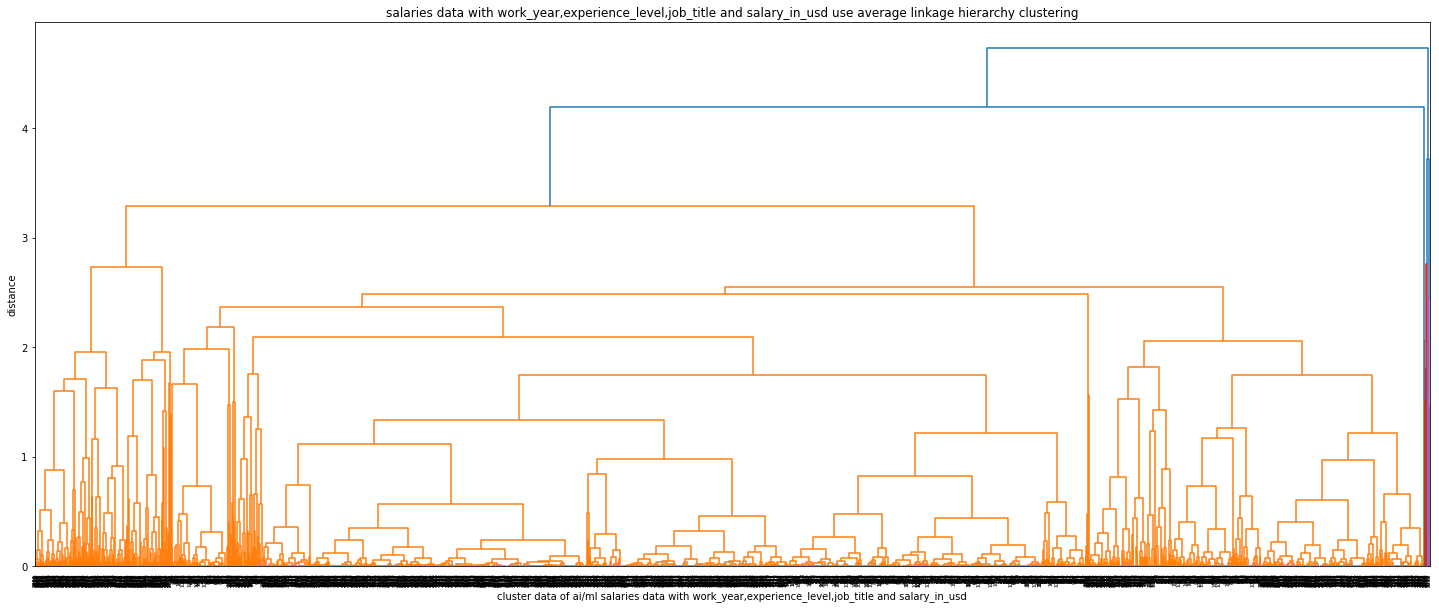

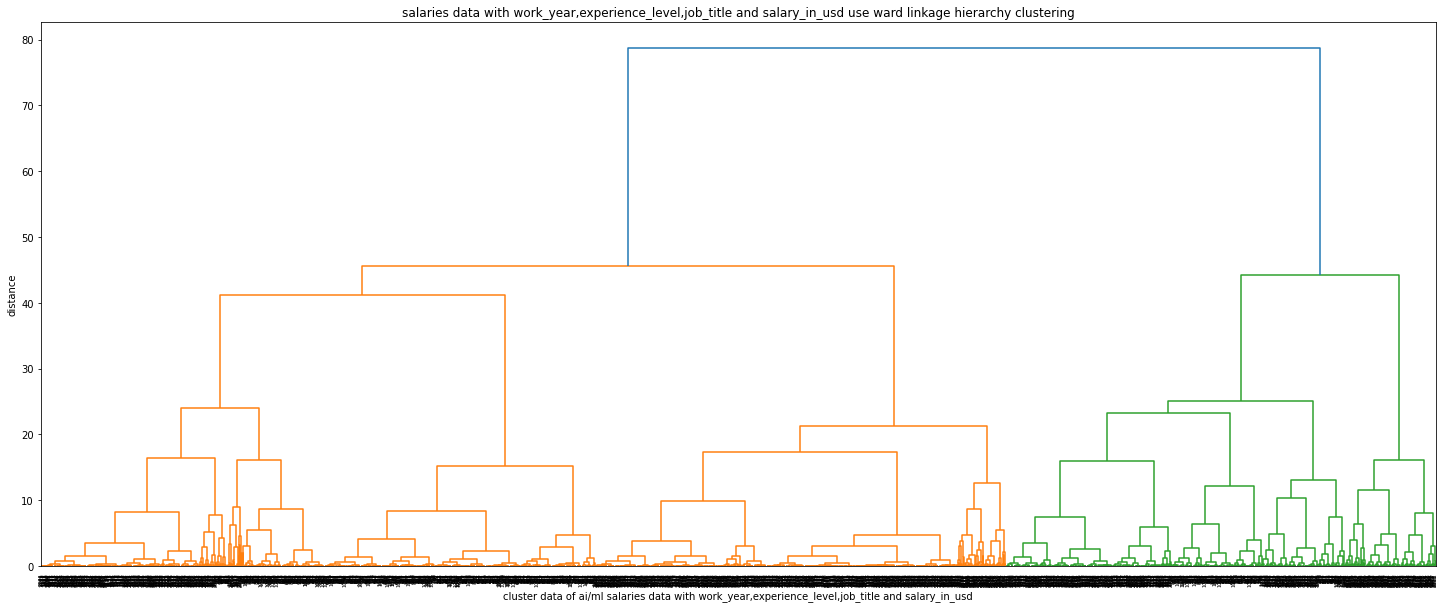

In [27]:
# heirarchy cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange

# Create a linkage object.
methods = ['single','complete','average','ward']
linkage_col = dict()
for method in methods:
    # Create the figure and set it's size.
    plt.figure(figsize=(25,10))
    
    linkage_col[method] = linkage(features, method=method)

    # Make a dendrogram from the linkage object.
    dendrogram(linkage_col[method], orientation='top', distance_sort='descending')
    
    plt.xlabel("cluster data of ai/ml salaries data with work_year,experience_level,job_title and salary_in_usd")
    plt.ylabel("distance")
    plt.title(f"salaries data with work_year,experience_level,job_title and salary_in_usd use {method} linkage hierarchy clustering")
    plt.show()

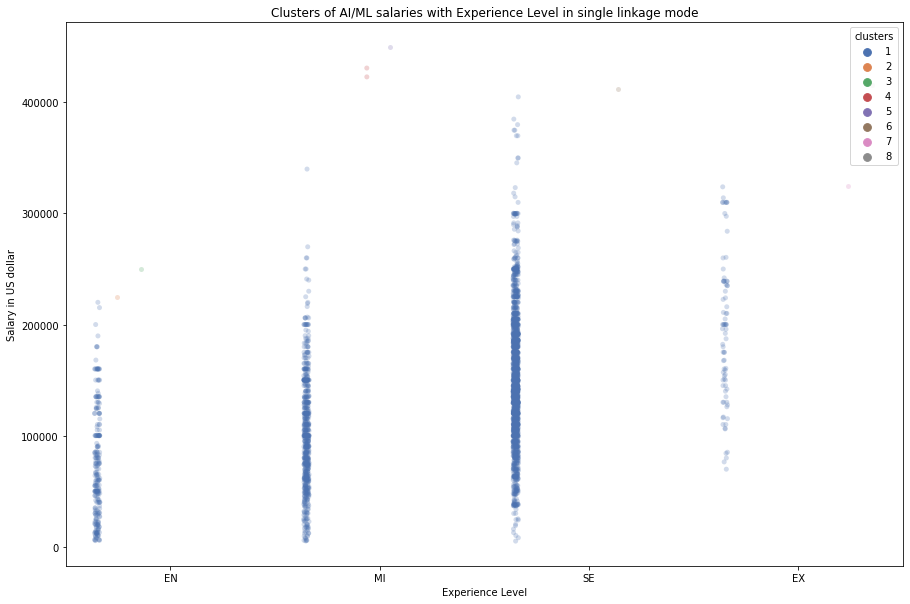

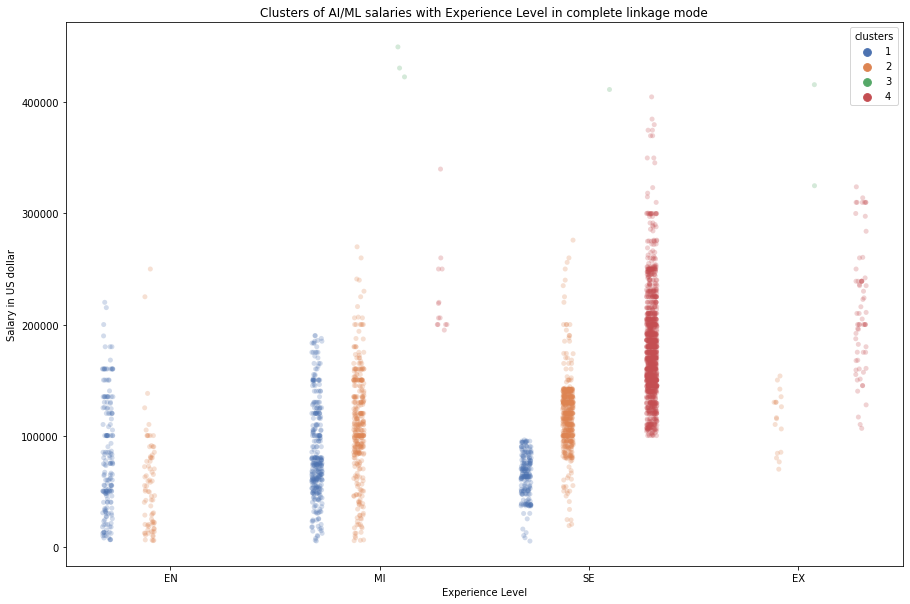

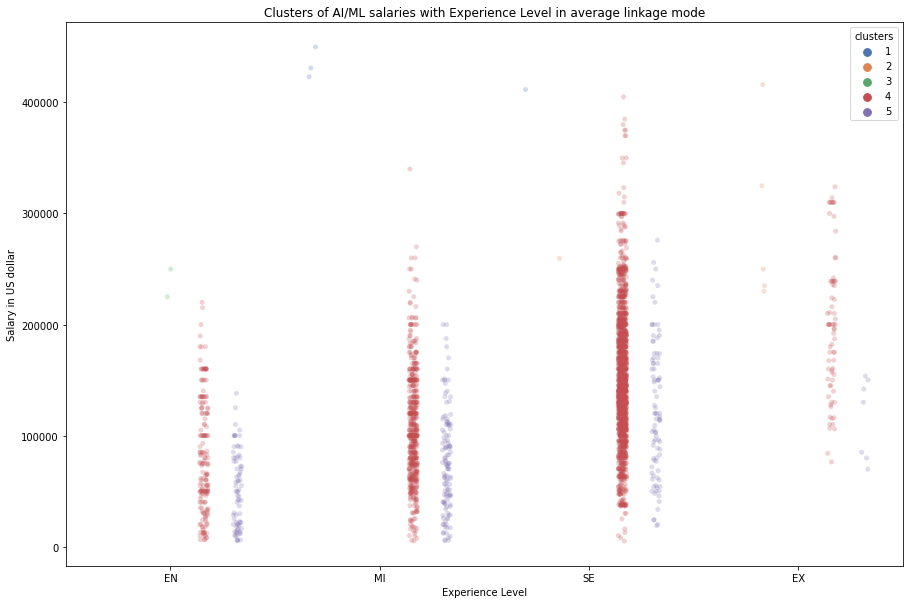

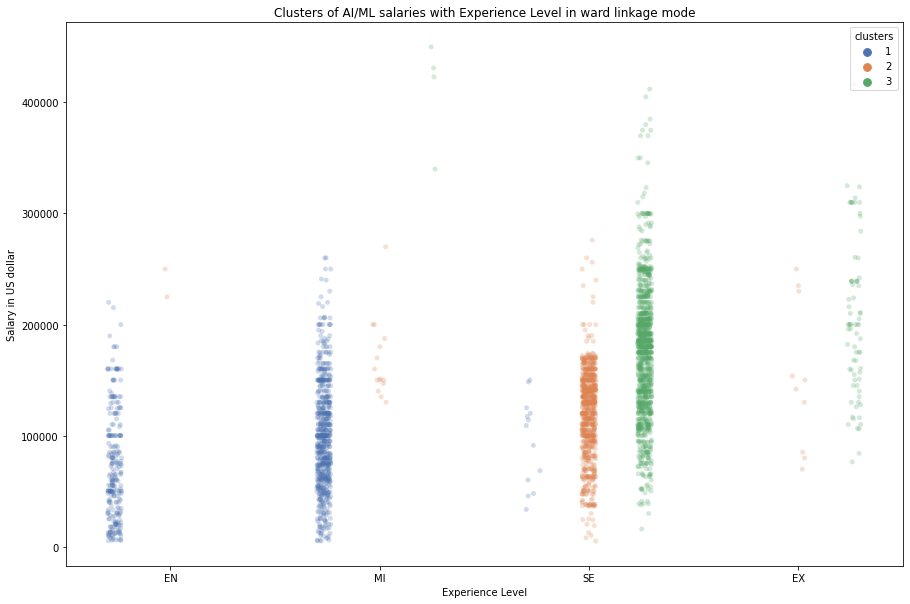

In [21]:
# Determine the clusters using fcluster
from scipy.cluster.hierarchy import fcluster


max_d = [1.5,6.2,3,45]  # Adjust this value based on the dendrogram
i = 0

cluster_df = df.copy()
for method in methods:
    clusters = fcluster(linkage_col[method], t=max_d[i], criterion='distance')

    # Add the cluster labels to the DataFrame
    cluster_df['Cluster_'+method] = clusters

    # Plot the clusters
    plt.figure(figsize=(15, 10))

    # # Create scatter plot for each cluster
    # for cluster_id in selected_df['Cluster'].unique():
    #     cluster_df = cluster_df[cluster_df['Cluster'] == cluster_id]
    
    # sns.boxplot(x="work_year", y="salary_in_usd", data=cluster_df ,hue='Cluster', palette="deep")
    sns.stripplot(x="experience_level", y="salary_in_usd", data=cluster_df ,hue='Cluster_'+method, palette="deep", dodge=True, alpha=0.25)
    plt.ylabel("Salary in US dollar")
    plt.xlabel("Experience Level")
    plt.title(f"Clusters of AI/ML salaries with Experience Level in {method} linkage mode")
    plt.legend(title="clusters",loc="upper right")
    plt.show()
    i = i + 1

In [22]:
cluster_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Cluster_single,Cluster_complete,Cluster_average,Cluster_ward
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M,1,1,4,1
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M,1,1,4,1
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M,1,1,4,1
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M,1,1,4,1
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M,1,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,6,3,1,3
3002,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,1,2,5,2
3003,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,1,2,5,1
3004,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,1,2,5,1


In [23]:
# evaluation
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score,normalized_mutual_info_score
sil_scores = dict()
ri_scores = dict()
adr_scores = dict()
nmi_scores = dict()

for method in methods:
    sil_scores[method] = round(silhouette_score(features,cluster_df['Cluster_'+method]),4) # use features check
    ri_scores[method] = round(rand_score(selected_df['experience_level'],cluster_df['Cluster_'+method]),4) # use experience level check
    adr_scores[method] = round(adjusted_rand_score(selected_df['experience_level'],cluster_df['Cluster_'+method]),4) # use experience level check
    nmi_scores[method] = round(normalized_mutual_info_score(selected_df['experience_level'],cluster_df['Cluster_'+method]),4) # use experience level check
    
print(f"silhouette score of features: \n{sil_scores}")
print(f"rand index score of experience level: \n{ri_scores}")
print(f"adjusted rand index score of experience level: \n{adr_scores}")
print(f"normalized mutual infomaltion score of experience level: \n{nmi_scores}")

silhouette score of features: 
{'single': 0.3834, 'complete': 0.2426, 'average': 0.3694, 'ward': 0.2813}
rand index score of experience level: 
{'single': 0.4995, 'complete': 0.6198, 'average': 0.5657, 'ward': 0.715}
adjusted rand index score of experience level: 
{'single': 0.0064, 'complete': 0.2379, 'average': 0.1354, 'ward': 0.4287}
normalized mutual infomaltion score of experience level: 
{'single': 0.012, 'complete': 0.2409, 'average': 0.0646, 'ward': 0.5653}
